In [21]:
import medmnist
import numpy as np
from medmnist import INFO
from tqdm import tqdm
import plotly.graph_objects as go

# === Parameters ===
OCCUPANCY_THRESHOLD = 0.3  # Voxels > this are considered occupied
data_flag = "organmnist3d"

# === Load Dataset Info ===
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# === Load all splits ===
train_dataset = DataClass(split="train", download=True)
val_dataset = DataClass(split="val", download=True)
test_dataset = DataClass(split="test", download=True)

# === Combine all datasets ===
all_data = train_dataset + val_dataset + test_dataset

# === Convert each image to its own point cloud ===
all_point_clouds = []  # List of (N_points, 3) arrays

print("Extracting point clouds for each 3D volume...")
for img, _ in tqdm(all_data):
    img = img.squeeze()  # Shape: (28, 28, 28)
    occupied = img > OCCUPANCY_THRESHOLD

    # Extract (x, y, z) coordinates of occupied voxels
    z, y, x = np.where(occupied)
    coords = np.stack([x, y, z], axis=1)

    all_point_clouds.append(coords)

print(f"Generated {len(all_point_clouds)} point clouds.")
print(f"Example: Point cloud of first image has shape {all_point_clouds[0].shape}")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This registers the 3D projection
import numpy as np

# Let's say you have your point clouds as a list of arrays:
# all_point_clouds = [...]  # Already generated from previous code

def visualize_point_cloud(pc, title="Point Cloud"):
    x, y, z = pc[:, 0], pc[:, 1], pc[:, 2]
    fig = go.Figure(data=go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers',
        marker=dict(size=2, color=z, colorscale='Viridis', opacity=0.8)
    ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title='X',
            yaxis_title='Y',
            zaxis_title='Z'
        ),
        margin=dict(l=0, r=0, b=0, t=40)
    )
    fig.show()



Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Extracting point clouds for each 3D volume...


100%|██████████| 1742/1742 [00:00<00:00, 2142.50it/s]

Generated 1742 point clouds.
Example: Point cloud of first image has shape (7919, 3)


In [22]:
# Example: visualize the 5th image's point cloud
visualize_point_cloud(all_point_clouds[6], title="OrganMNIST3D - Sample #4")


In [19]:
  # Voxels > this are considered occupied
data_flag = "nodulemnist3d"
OCCUPANCY_THRESHOLD = 0.1

# === Load Dataset Info ===
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# === Load all splits ===
train_dataset = DataClass(split="train", download=True)
val_dataset = DataClass(split="val", download=True)
test_dataset = DataClass(split="test", download=True)

# === Combine all datasets ===
all_data = train_dataset + val_dataset + test_dataset

# === Convert each image to its own point cloud ===
all_point_clouds = []  # List of (N_points, 3) arrays

print("Extracting point clouds for each 3D volume...")
for img, _ in tqdm(all_data):
    img = img.squeeze()  # Shape: (28, 28, 28)
    occupied = img > OCCUPANCY_THRESHOLD

    # Extract (x, y, z) coordinates of occupied voxels
    z, y, x = np.where(occupied)
    coords = np.stack([x, y, z], axis=1)

    all_point_clouds.append(coords)

print(f"Generated {len(all_point_clouds)} point clouds.")
print(f"Example: Point cloud of first image has shape {all_point_clouds[0].shape}")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This registers the 3D projection
import numpy as np

# Let's say you have your point clouds as a list of arrays:
# all_point_clouds = [...]  # Already generated from previous code

def visualize_point_cloud(pc, title="Point Cloud"):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = pc[:, 0], pc[:, 1], pc[:, 2]
    ax.scatter(x, y, z, s=2, color='red') # You can change color map

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()


Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\nodulemnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\nodulemnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\nodulemnist3d.npz
Extracting point clouds for each 3D volume...


100%|██████████| 1633/1633 [00:01<00:00, 1628.02it/s]

Generated 1633 point clouds.
Example: Point cloud of first image has shape (17851, 3)


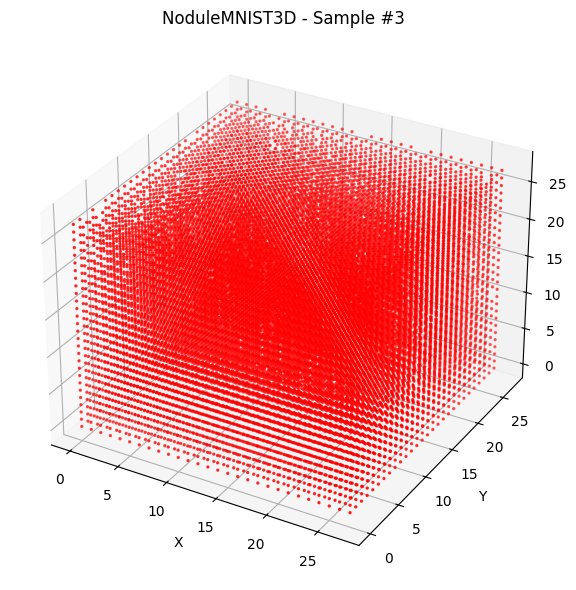

In [18]:
visualize_point_cloud(all_point_clouds[2], title="NoduleMNIST3D - Sample #3")

In [23]:

import os

# === Parameters ===
OCCUPANCY_THRESHOLD = 0.3  # Voxels > this are considered occupied
data_flag = "organmnist3d"
output_dir = "point_clouds"  # Directory to save .npy files

# === Load Dataset Info ===
info = INFO[data_flag]
DataClass = getattr(medmnist, info["python_class"])

# === Load all splits ===
train_dataset = DataClass(split="train", download=True)
val_dataset = DataClass(split="val", download=True)
test_dataset = DataClass(split="test", download=True)

# === Combine all datasets ===
all_data = train_dataset + val_dataset + test_dataset

# === Create output directory ===
os.makedirs(output_dir, exist_ok=True)

# === Convert each image to its own point cloud ===
all_point_clouds = []  # List of (N_points, 3) arrays

print("Extracting point clouds for each 3D volume...")
for i, (img, _) in tqdm(enumerate(all_data)):
    img = img.squeeze()  # Shape: (28, 28, 28)
    occupied = img > OCCUPANCY_THRESHOLD

    # Extract (x, y, z) coordinates of occupied voxels
    z, y, x = np.where(occupied)
    coords = np.stack([x, y, z], axis=1)

    # Save each point cloud as a .npy file
    np.save(os.path.join(output_dir, f"point_cloud_{i}.npy"), coords)

print(f"Generated and saved {len(all_data)} point clouds in {output_dir}.")


Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Using downloaded and verified file: C:\Users\AVIRUP\.medmnist\organmnist3d.npz
Extracting point clouds for each 3D volume...


1742it [00:03, 496.86it/s]

Generated and saved 1742 point clouds in point_clouds.
